In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IDSimPy.analysis.trajectory as tra
import IDSimPy.analysis.visualization as vis

In [10]:
#open a (legacy) hdf5 file:
hdf5_file = os.path.join('..','test','analysis','data', 'qitSim_2019_04_scanningTrapTest',
                                      'qitSim_2019_04_10_001_trajectories.hd5')
traj_hdf5 = tra.read_legacy_hdf5_trajectory_file(hdf5_file)


#the resulting trajectory object is of class Trajectory:
print(type(traj_hdf5))

#with positions, the time step times, the number of particles and time steps, 
#and optional particle and trajectory attributes: 
print(traj_hdf5.positions)
print(traj_hdf5.particle_attribute_names)

<class 'IDSimPy.analysis.trajectory.Trajectory'>
[[[ 3.02714150e-04  1.07762564e-04 -2.31972357e-04 ...  2.97682673e-05
    2.97682673e-05  2.97682673e-05]
  [-2.14958651e-04 -7.65226723e-05  1.64724581e-04 ... -2.11385777e-05
   -2.11385777e-05 -2.11385777e-05]
  [ 4.15690971e-04 -3.76640237e-04  2.33336046e-04 ... -5.01252245e-03
   -5.01252245e-03 -5.01252245e-03]]

 [[ 2.88005191e-04  1.02526355e-04 -2.20700764e-04 ... -2.87994073e-04
   -1.60673750e-04  1.80673596e-04]
  [-3.62174382e-04 -1.28929678e-04  2.77537212e-04 ...  3.62160412e-04
    2.02051611e-04 -2.27201977e-04]
  [-1.72432192e-04  1.56233596e-04 -9.67897940e-05 ...  1.36512899e-04
    2.57988577e-05 -1.82500531e-04]]

 [[-3.94451461e-04 -1.40419928e-04  3.02271423e-04 ...  1.61429503e-04
   -5.46429001e-05 -1.97256071e-04]
  [ 1.61907388e-04  5.76370658e-05 -1.24070968e-04 ... -6.62606981e-05
    2.24288415e-05  8.09661433e-05]
  [-4.22681944e-04  3.82974453e-04 -2.37260232e-04 ... -4.58019291e-04
    2.98541709e-04 -

In [12]:
# positions in a static trajectory, with invariant particle number across all time steps,
# is a three dimensional np array: 
print(type(traj_hdf5.positions))

#with the dimensions [ions, spatial dimensions (x,y,z), time steps]
print(np.shape(traj_hdf5.positions))

<class 'numpy.ndarray'>
(600, 3, 51)


In [13]:
#thus the positions of the ion in the first timestep is given by: 
ts = traj_hdf5.positions[:,:,0]
print(ts)

[[ 3.0271415e-04 -2.1495865e-04  4.1569097e-04]
 [ 2.8800519e-04 -3.6217438e-04 -1.7243219e-04]
 [-3.9445146e-04  1.6190739e-04 -4.2268194e-04]
 ...
 [-4.6160546e-04 -3.5421105e-04 -2.0950858e-04]
 [-1.8716071e-07 -1.2467313e-04 -1.7373535e-04]
 [ 4.5244661e-04 -3.6458630e-04  4.4252138e-04]]


avg x: -2.1665435e-06  avg y: 6.0759803e-06
std x: 0.00029316492  std y: 0.0002891187


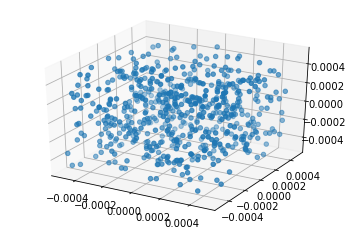

In [14]:
#which can be analyzed plotted with matplotlib: 
x,y,z = ts[:,0],ts[:,1],ts[:,2]

print('avg x:',np.mean(x),' avg y:',np.mean(y))
print('std x:',np.std(x),' std y:',np.std(y),)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

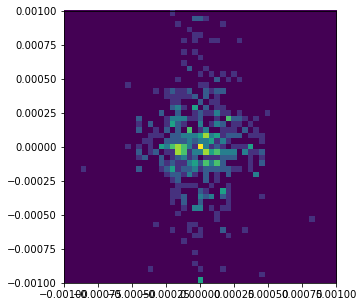

In [15]:
# the visualization lib can generate density plots: 
ts_index = 50
vis.plot_density_xz(traj_hdf5, ts_index,
                    xedges=np.linspace(-0.001, 0.001, 50),
                    zedges=np.linspace(-0.001, 0.001, 50),
                    figsize=(5,5),
                    axis_equal=True);

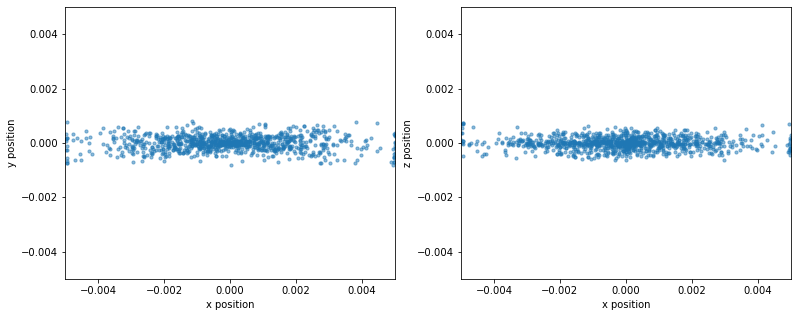

In [16]:
# new HDF5 format allows also simulations where the number of particles changes 
# during the simulation: 
hdf5_variable_projectname = os.path.join('..','test','analysis','data', 
                'qitSim_2019_07_variableTrajectoryQIT', 'qitSim_2019_07_22_001')

# which can be rendered as scatter animation in a high level function:
# (with fixed x,y,z limits)
result_name = os.path.join('results','variable_HDF5_animation')
vis.render_scatter_animation(
    hdf5_variable_projectname, result_name, 
    xlim=(-0.005,0.005), ylim=(-0.005,0.005), zlim=(-0.005,0.005),
    interval=1, alpha=0.5)